In [880]:
# import tensorflow as tf
# import keras

In [881]:
# tf.__version__, keras.__version__

In [882]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import jovian

In [883]:
data = pd.read_csv("Employee Attrition.csv")

In [884]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [885]:
data.shape

(1470, 35)

In [886]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [887]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

🤠🤠🤠 Hence we can see there are no missing values ....then chill

In [888]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [889]:
# getting only categorical columns

data.select_dtypes(include=['object']).dtypes

Attrition                   object
BusinessTravel              object
Department                  object
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement              object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
Over18                      object
OverTime                    object
PerformanceRating           object
RelationshipSatisfaction    object
WorkLifeBalance             object
dtype: object

In [890]:
## getting the numerical columns
data.select_dtypes(include=['int64']).dtypes

Age                        int64
DailyRate                  int64
DistanceFromHome           int64
EmployeeCount              int64
EmployeeNumber             int64
HourlyRate                 int64
JobLevel                   int64
MonthlyIncome              int64
MonthlyRate                int64
NumCompaniesWorked         int64
PercentSalaryHike          int64
StandardHours              int64
StockOptionLevel           int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
dtype: object

In [891]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [892]:
# Encoding the Attrition coulmns so we can fix it for EDA

data['Attrition'] = data['Attrition'].factorize(['No', 'Yes'])[0]

In [893]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x24fc7928970>,
 [Text(-1.0493363707830166, 0.5821453263163142, 'No'),
  Text(1.0493363707830163, -0.5821453263163142, 'Yes')],
 [Text(-0.6121128829567596, 0.33958477368451656, '83.9%'),
  Text(0.6121128829567595, -0.3395847736845166, '16.1%')])

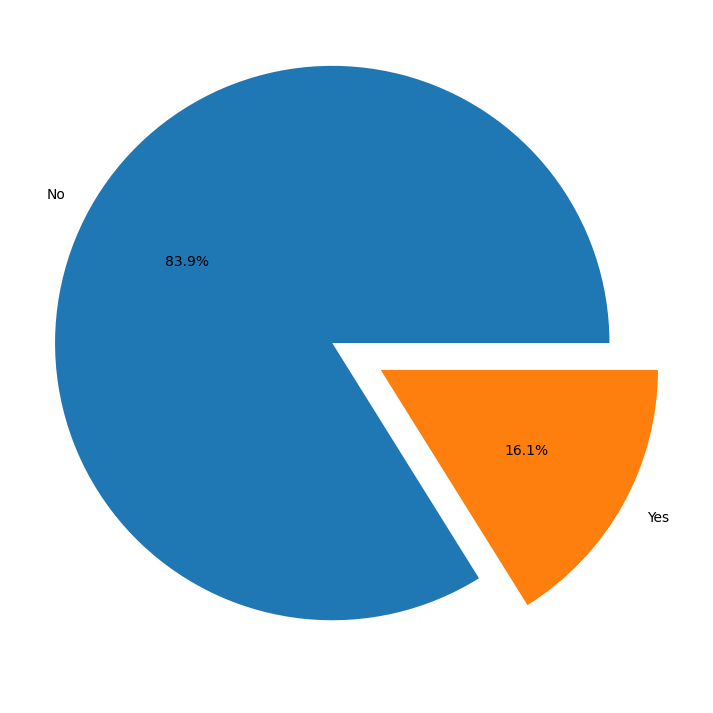

In [894]:
# lets do some visualization

plt.figure(figsize=(9, 9))
pie = data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels= ['No', 'Yes'], autopct='%1.1f%%')

Here we can see 84 percent employee didn't leave the company

C:\Users\Tausif\AppData\Local\Temp\ipykernel_6652\1779254536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


<AxesSubplot:xlabel='Age', ylabel='Density'>

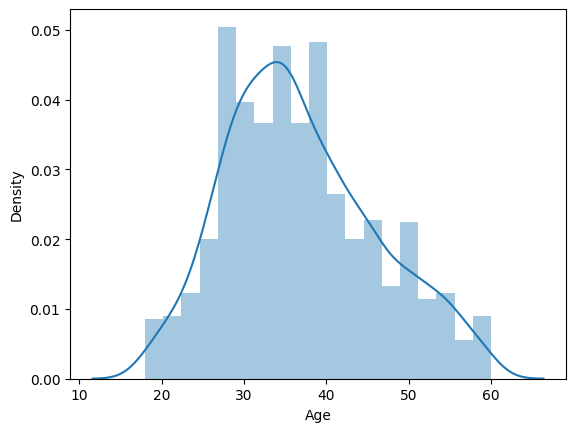

In [895]:
sns.distplot(data["Age"])

In [896]:
data[['Age']].value_counts().head(10)

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [897]:
# getting value counts of employee of the same age

data[['Age']].value_counts().sort_values(ascending=False).head(10)

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [898]:
data[['Age']].value_counts().sort_values(ascending=False).tail()

Age
59     10
19      9
18      8
60      5
57      4
dtype: int64

Employees aged between 29 to 40 has highest number in the company and similary aged persons from 19 to 60 has a low number

In [899]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [900]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [901]:
# dropping two unnecessaru columns

data  = data.drop(['StandardHours', 'EmployeeCount'], axis=1)

<AxesSubplot:>

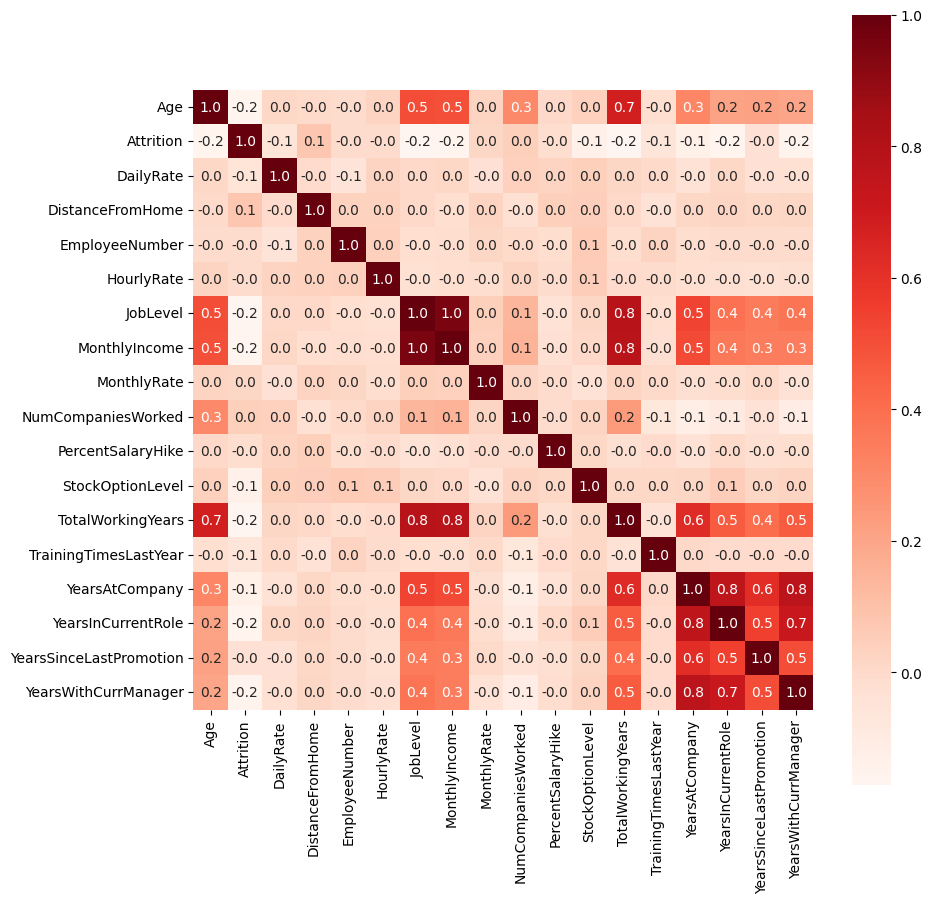

In [902]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

As we can see, there isn't a very strong correlation of the target column with any of the numerical columns. But we can see other correlations such as;

1. More senior employees have higher total working years (very obvious)
2. The more years an employee puts in, the more their monthly income increases
3. A lot of employees remain in their current role and also under the same manager as years pass by meaning they don't get promotion and this is a major factor contributing to attrition

From here, we can deduct that the lack of promotions may be a crucial factor to attritions.

<AxesSubplot:xlabel='YearsAtCompany'>

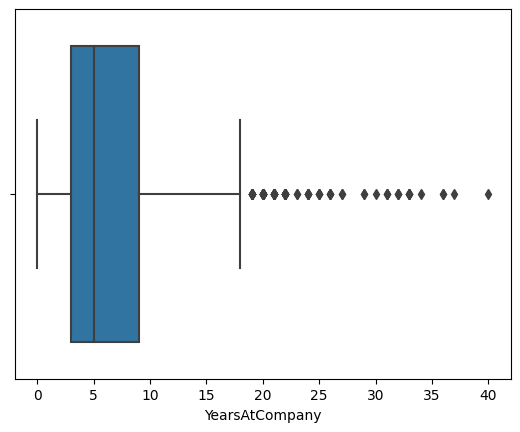

In [903]:
sns.boxplot(x = data["YearsAtCompany"])

Most employees remain in the company for 3-9 years with median being 5 years.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

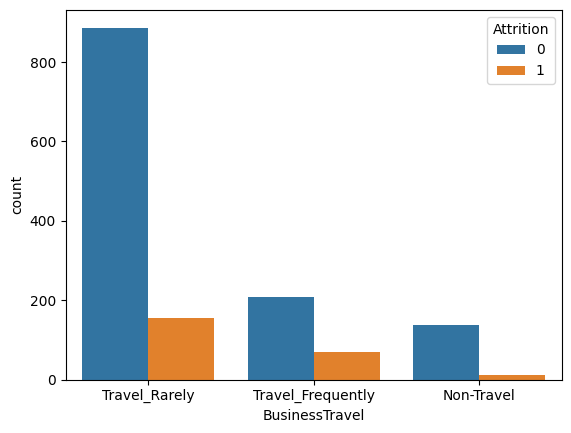

In [904]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=data)

Most employees who travel rarely don't leave the company.Employees on a business travels or not doesn't really matters and make no effect on attrition.

<AxesSubplot:xlabel='Department', ylabel='count'>

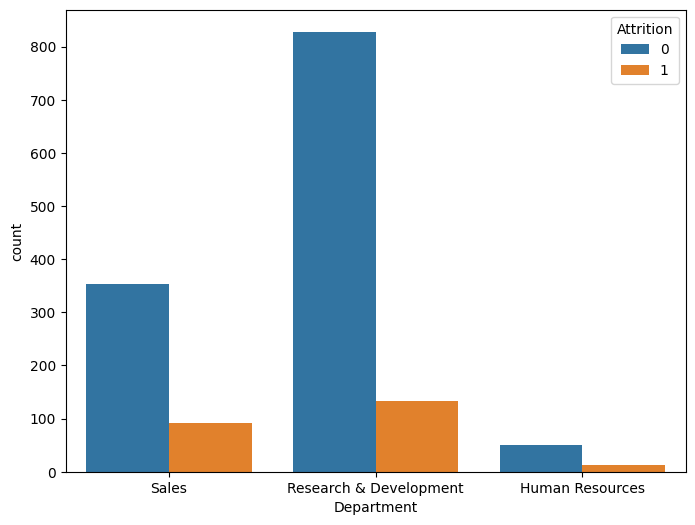

In [905]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=data)

1. Most attritions are from the research & development department
2. For sales department to come second by a small margin.
3. Human resources has the least number of attritions.

But we need to keep in mind that R&D has a lot more employees than sales and HR.
If we consider percentage of attritions per department, we would see that the HR department has most attritions.

<AxesSubplot:xlabel='Gender', ylabel='count'>

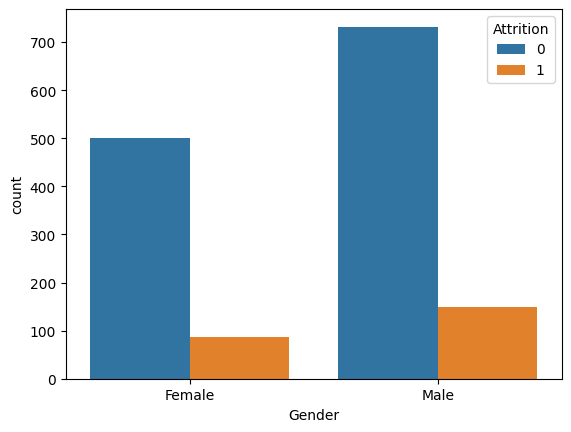

In [906]:
sns.countplot(x='Gender', hue='Attrition', data=data)

Incase of gender male percentage is higher than female and same in case of Atrition

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

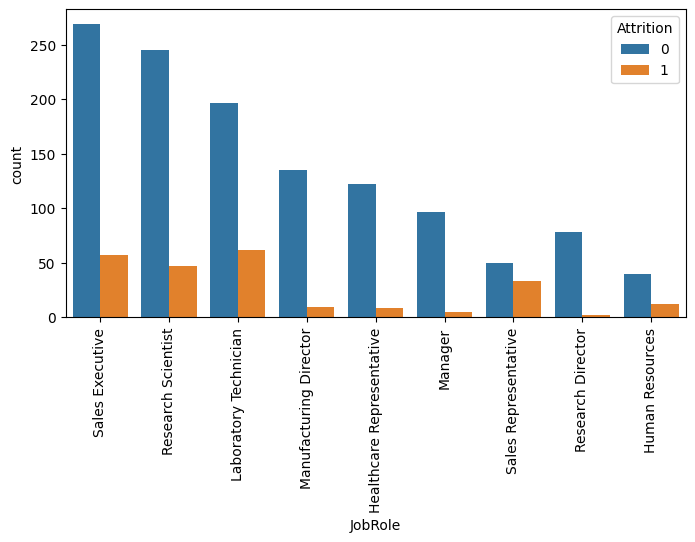

In [907]:
plt.figure(figsize=(8,4))
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.xticks(rotation=90)

Most laboratory technicians have departed from their jobs as compared to other departments

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

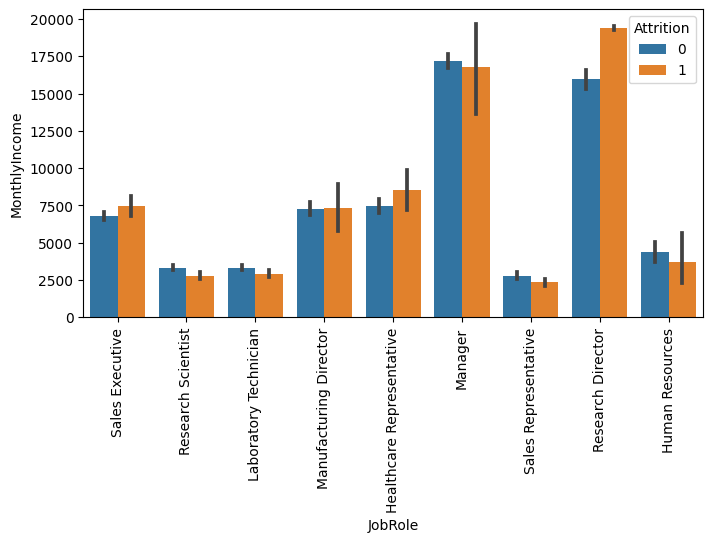

In [908]:
plt.figure(figsize=(8,4))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=data)
plt.xticks(rotation=90)

HR, Laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

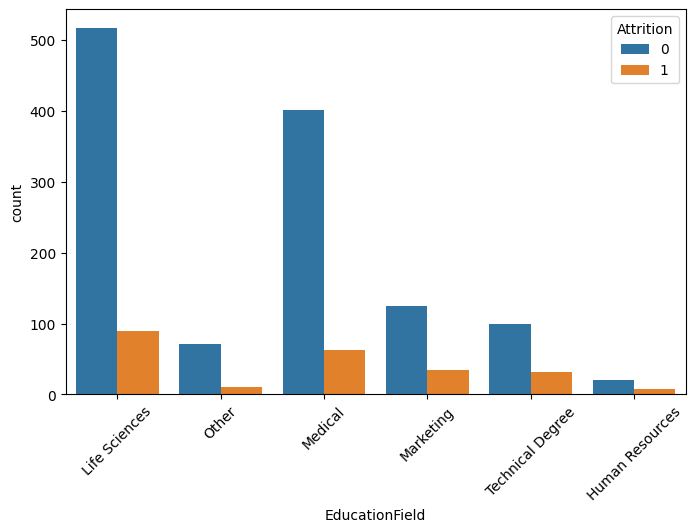

In [909]:
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField', hue='Attrition', data=data);
plt.xticks(rotation=45)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

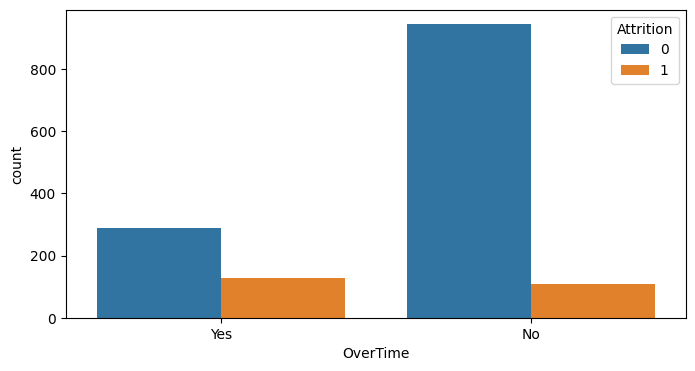

In [910]:
plt.figure(figsize=(8,4))
sns.countplot(x='OverTime', hue='Attrition', data=data)

overtime and educationfield have no effect on Attrition

In [911]:
data['RelationshipSatisfaction'].value_counts()

High         459
Very High    432
Medium       303
Low          276
Name: RelationshipSatisfaction, dtype: int64

In [912]:
# lets do some label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [913]:
data['RelationshipSatisfaction'] = LE.fit_transform(data['RelationshipSatisfaction'])
data['RelationshipSatisfaction'].value_counts()

0    459
3    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [914]:
data['Education'].value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

In [915]:
data['Education'] = LE.fit_transform(data['Education'])
data['Education'].value_counts()

0    572
4    398
2    282
1    170
3     48
Name: Education, dtype: int64

In [916]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [917]:
data['EducationField'] = LE.fit_transform(data['EducationField'])
data['EducationField'].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

In [918]:
data['EnvironmentSatisfaction'].value_counts()

High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64

In [919]:
data['EnvironmentSatisfaction'] = LE.fit_transform(data['EnvironmentSatisfaction'])
data['EnvironmentSatisfaction'].value_counts()

0    453
3    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [920]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [921]:
data['Department'] = LE.fit_transform(data['Department'])
data['Department'].value_counts()

1    961
2    446
0     63
Name: Department, dtype: int64

In [922]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [923]:
data['Gender'] = data['Gender'].factorize(['Male', 'Female'])[0]
data['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [924]:
data['JobInvolvement'].value_counts()

High         868
Medium       375
Very High    144
Low           83
Name: JobInvolvement, dtype: int64

In [925]:
data['JobInvolvement'] = LE.fit_transform(data['JobInvolvement'])
data['JobInvolvement'].value_counts()

0    868
2    375
3    144
1     83
Name: JobInvolvement, dtype: int64

In [926]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [927]:
data['JobRole'] = LE.fit_transform(data['JobRole'])
data['JobRole'].value_counts()

7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64

In [928]:
data['JobSatisfaction'].value_counts()

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64

In [929]:
data['JobSatisfaction'] = LE.fit_transform(data['JobSatisfaction'])
data['JobSatisfaction'].value_counts()

3    459
0    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [930]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [931]:
data['MaritalStatus'] = LE.fit_transform(data['MaritalStatus'])
data['MaritalStatus'].value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

In [932]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [933]:
data['Over18'] = LE.fit_transform(data['Over18'])
data['Over18'].value_counts()

0    1470
Name: Over18, dtype: int64

In [934]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [935]:
# Encoding the Attrition coulmns so we can fix it for EDA

data['OverTime'] = data['OverTime'].factorize(['No', 'Yes'])[0]

In [936]:
data['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [937]:
data['PerformanceRating'].value_counts()

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64

In [938]:
data['PerformanceRating'] = data['PerformanceRating'].factorize(['Excellent', 'Outstanding'])[0]

In [939]:
data['PerformanceRating'].value_counts()

0    1244
1     226
Name: PerformanceRating, dtype: int64

In [940]:
data['WorkLifeBalance'].value_counts()

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64

In [941]:
data['WorkLifeBalance'] = LE.fit_transform(data['WorkLifeBalance'])
data['WorkLifeBalance'].value_counts()

2    893
3    344
1    153
0     80
Name: WorkLifeBalance, dtype: int64

In [942]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [943]:
data['BusinessTravel'] = LE.fit_transform(data['BusinessTravel'])
data['BusinessTravel'].value_counts()

2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

In [944]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,0,1,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,1,1,2,0,...,1,3,1,10,3,2,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,3,...,0,2,0,7,3,2,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,3,...,0,0,0,8,3,2,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,0,3,1,6,3,2,2,2,2,2


In [945]:
# splitting the data

X = data.drop(['Attrition','BusinessTravel','EducationField','OverTime'], axis=1) # Features
Y = data['Attrition'] # Target

In [946]:
# Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [947]:
# Splitting Data for Training and Testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [948]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 29)
(1029, 29)
(441, 29)


### Model Building

In [949]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [950]:
## K Fold cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import numpy as np

In [951]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

model_LGR = LogisticRegression(C=5, penalty = "l2", solver="newton-cg")
model_LGR.fit(X_train, Y_train)

Y_pred = model_LGR.predict(X_test)
print(" Classification Report ".center(120,"+"), classification_report(Y_test, Y_pred))
print()
Logistic_accuracy = accuracy_score(Y_test, Y_pred)*100
print("Accuracy_score: ", Logistic_accuracy)


## applying K fold cross validation 

## preparing the cross value procedure
CV = KFold(n_splits= 10, random_state=1, shuffle=True)

scores = cross_val_score(model_LGR, X, Y, scoring='accuracy', cv=CV, n_jobs= -1)
print("Accuracy after Cross validation = ", np.average(scores)*100 )

++++++++++++++++++++++++++++++++++++++++++++++++ Classification Report +++++++++++++++++++++++++++++++++++++++++++++++++               precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.53      0.13      0.20        71

    accuracy                           0.84       441
   macro avg       0.69      0.55      0.56       441
weighted avg       0.80      0.84      0.80       441


Accuracy_score:  84.12698412698413
Accuracy after Cross validation =  84.42176870748298


In [952]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators= 350, max_depth= 4, criterion = "gini") 
model_RFC.fit(X_train, Y_train)

Y_pred = model_RFC.predict(X_test)
print(" Classification Report ".center(120,"+"), classification_report(Y_test, Y_pred))
print()
RF_accuracy =  accuracy_score(Y_test, Y_pred)*100
print("Accuracy_score: ", RF_accuracy)

## applying K fold cross validation 

## preparing the cross value procedure
CV = KFold(n_splits= 10, random_state=1, shuffle=True)

scores = cross_val_score(model_RFC, X, Y, scoring='accuracy', cv=CV, n_jobs= -1)
print("Accuracy after Cross validation = ", np.average(scores)*100 )

++++++++++++++++++++++++++++++++++++++++++++++++ Classification Report +++++++++++++++++++++++++++++++++++++++++++++++++               precision    recall  f1-score   support

           0       0.85      1.00      0.92       370
           1       0.80      0.06      0.11        71

    accuracy                           0.85       441
   macro avg       0.82      0.53      0.51       441
weighted avg       0.84      0.85      0.79       441


Accuracy_score:  84.58049886621315
Accuracy after Cross validation =  84.35374149659862


In [953]:
## SVM_Linear
from sklearn.svm import SVC

model_SVM = SVC(C = 12 , kernel="linear")
model_SVM.fit(X_train, Y_train)

Y_pred = model_SVM.predict(X_test)
print(" Classification Report ".center(120,"+"), classification_report(Y_test, Y_pred))
print()
Linear_SVM_accuracy = accuracy_score(Y_test, Y_pred)*100
print("Accuracy_score: ", Linear_SVM_accuracy)

## applying K fold cross validation 

## preparing the cross value procedure
CV = KFold(n_splits= 10, random_state=1, shuffle=True)

scores = cross_val_score(model_SVM, X, Y, scoring='accuracy', cv=CV, n_jobs= -1)
print("Accuracy after Cross validation = ", np.average(scores)*100 )

C:\Users\Tausif\anaconda3\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tausif\anaconda3\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tausif\anaconda3\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

++++++++++++++++++++++++++++++++++++++++++++++++ Classification Report +++++++++++++++++++++++++++++++++++++++++++++++++               precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441


Accuracy_score:  83.90022675736961
Accuracy after Cross validation =  83.87755102040815


In [954]:
# SVM_kernel

from sklearn.svm import SVC

model_SVM_kernel = SVC(C = 12 , kernel="rbf", gamma= 0.01)
model_SVM_kernel.fit(X_train, Y_train)

Y_pred = model_SVM_kernel.predict(X_test)
print(" Classification Report ".center(120,"+"), classification_report(Y_test, Y_pred))
print()
kernel_SVM_accuracy = accuracy_score(Y_test, Y_pred)*100
print("Accuracy_score: ", kernel_SVM_accuracy)

## applying K fold cross validation 

## preparing the cross value procedure
CV = KFold(n_splits= 10, random_state=1, shuffle=True)

scores = cross_val_score(model_SVM_kernel, X, Y, scoring='accuracy', cv=CV, n_jobs= -1)
print("Accuracy after Cross validation = ", np.average(scores)*100 )

++++++++++++++++++++++++++++++++++++++++++++++++ Classification Report +++++++++++++++++++++++++++++++++++++++++++++++++               precision    recall  f1-score   support

           0       0.86      0.95      0.91       370
           1       0.47      0.21      0.29        71

    accuracy                           0.83       441
   macro avg       0.67      0.58      0.60       441
weighted avg       0.80      0.83      0.81       441


Accuracy_score:  83.44671201814059
Accuracy after Cross validation =  83.33333333333334


In [874]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mdtausifc/cmp-emp-attrition" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mdtausifc/cmp-emp-attrition


'https://jovian.ai/mdtausifc/cmp-emp-attrition'